# Handling uncertainties in image processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tifffile as tiff
from lecture8_support import *

## Literature
### Books
Drosg, 2009, ["Dealing with uncertainties"](https://doi.org/0.1007/978-3-642-01384-3), Springer Verlag  
M. Grabe, 2014,["Measurement Uncertainties in Science and Technology"](https://doi.org/10.1007/978-3-319-04888-8), Springer Verlag  
Ch. Gillmann, 2018,["Image processing under uncertainty"](https://kluedo.ub.rptu.de/frontdoor/deliver/index/docId/5470/file/Dissertation_Christina_Gillmann.pdf), PhD Thesis, Uni Kaiserslautern

### Web resources
[Measurement errors - European Commission Glossary](https://cros-legacy.ec.europa.eu/content/measurement-error_en)  
[Detection limit - Wikipedia](https://en.wikipedia.org/wiki/Detection_limit)  
[Error propagation](https://www.webassign.net/question_assets/unccolphysmechl1/measurements/manual.html)  
[Error bands - Stack exchange](https://physics.stackexchange.com/questions/496841/what-should-be-the-real-error-band-of-a-fit-function)  


## Why do we need to talk about the uncertain?
> “Scientific knowledge is a body of statements of varying degree of certainty  
> – some most unsure, some nearly sure, but none absolutely certain.”  
>As found in Feynman, RP (1997) Surely You Are Joking, Mr. Feynman, Norton, New York.

## Which uncertainties are we dealing with?

<div class="row">
<div class="column">

### Technical certainties
- Metric
- Noise
- Unsharpness
- Effects from image processing
- Numerical errors 
    
</div>
<div class="column">    

### Field specific uncertainties
- Model simplifications
- Variations in population

</div>
</div>   
    

## Uncertainty categories

<div class="row">
<div class="column">

### Systematic
Reproducible - no statistical analysis
- Rounding errors 
- Uncalibrated systems
- Algorithmic choices
- Etc.

</div>    
<div class="column">  
    
### Random
Statistical fluctuations
- Natural variations in studied population
- Source fluctuations
- Detector noise
    
</div></div>

## Counting or measuring

<div class="row">
<div class="column">
        
__Counting__  
    
<center><img src="figures/np_counting.png" style="height:150px"/></center>
    
    
 - Discrete countable items
 - Absolute values
    
 Uncertainties: from preparation  

 _Example:_ area of segmented region
        
</div>
<div class="column">
         
__Measuring__  
    
<center><img src="figures/np_measure.png" style="height:150px"/></center>      
    
 - Physical quantities
 - Values with uncertainties
   
 Uncertainties: Noise, instrumentation  
    
 _Example:_ mixing ratios from gray levels
</div>
</div>

### Target practicing

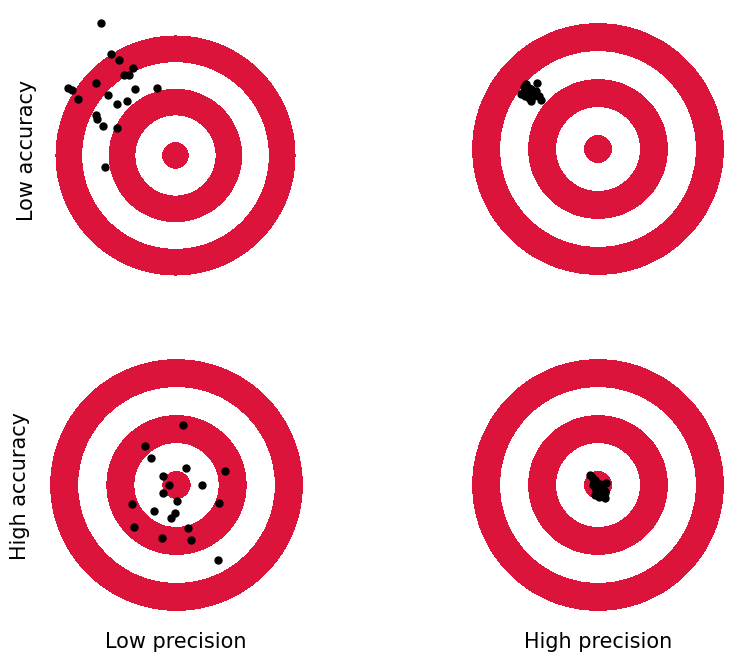

In [2]:
precacc(1000)

### Target practicing in statistical terms

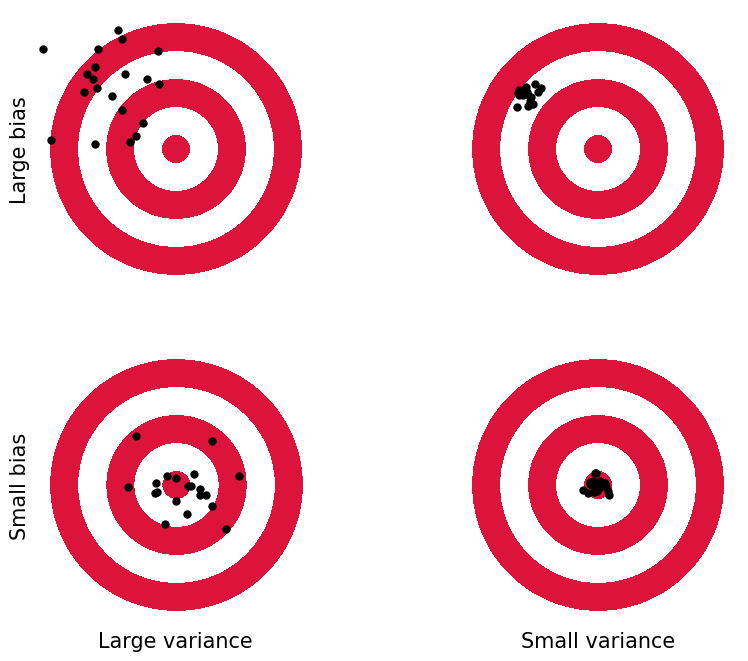

In [11]:
precacc(1000,['Large bias','Small bias','Large variance','Small variance'])

## Absolute vs relative uncertainties
Errors must be compared from a neutral perspective

<div class="row">
    <div class="column">

### Absolute uncertainty
Assume we can measure a distance with an error of 1mm
> Distance to the moon - 384400km

> The diameter of a coin - 20mm

</div>        
<div class="column">        
        
### Relative uncertainty
Relates the error to the measured quantity
    
> Distance to the moon - 0.000000002601457

> Diameter of a coin - 0.05
    
</div></div>

## Propagation of uncertainty


<div class="row">
    <div class="column">

### Uncertainty of f(x)

$$\sigma_f(x) = \frac{\partial f}{\partial x}\cdot \sigma_{x}$$        
        
</div>        
<div class="column">        
        
### Uncertainty of f(x,y)

$$\sigma_f(x,y) = \frac{\partial f}{\partial x}\cdot \sigma_{x} + \frac{\partial f}{\partial y}\cdot \sigma_{y} + \underbrace{\frac{\partial f}{\partial x}\cdot\frac{\partial f}{\partial y}\cdot\overline{\sigma_{xy}}}_{\mbox{x and y uncorrelated?}}$$        

    
</div></div>

## Uncertain quantities in imaging experiments

- Pixel size
- Segmentation
- Sampling time stamps in time series
- Intensity levels

### Three examples
- Determine the pixel size
- Measure the perimeter length
- Meassure water volume behind a pixel

### Example measure the pixel size
To measure pixel size we need:
- An object with known length
- An image of the object

$$\mbox{pixel size}=\frac{\mbox{Object length}}{\mbox{Pixel distance between edges}}$$

#### Uncertainty equation
We assume that the two measured values are uncorrelated
$$\frac{\sigma_{a/b}}{a/b}=\sqrt{\left(\frac{\sigma_a}{a}\right)^2 + \left(\frac{\sigma_b}{b}\right)^2}$$

[From this tutorial](https://www.webassign.net/question_assets/unccolphysmechl1/measurements/manual.html)

#### Our measurements
    

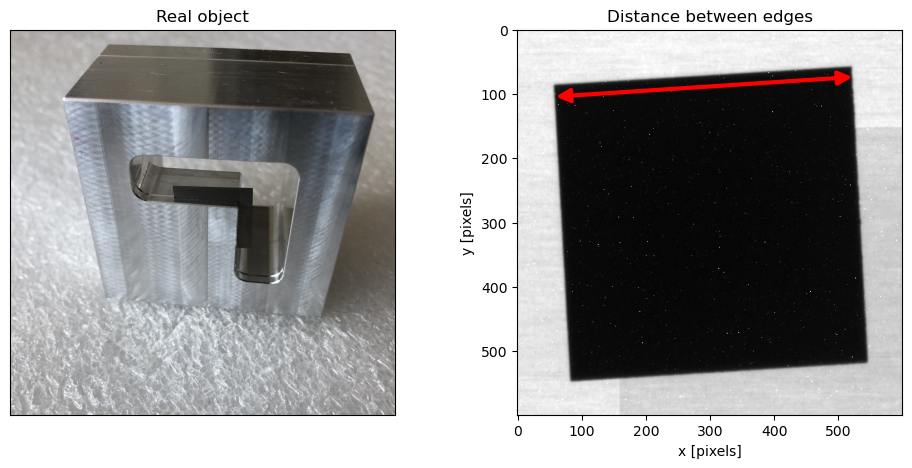

In [4]:
img1 = tiff.imread('data/edge20mm_0000.tif')
pic = plt.imread('figures/edge_object.jpg')
fig,ax=plt.subplots(1,2,figsize=(12,5))

ax[0].imshow(pic)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Real object')

ax[1].imshow(img1,vmin=300,vmax=30000,cmap='gray');
ax[1].set_xlabel('x [pixels]')
ax[1].set_ylabel('y [pixels]');
arrow = patches.FancyArrowPatch((55,104), (526, 73),
                                 mutation_scale=20,
                                 #ec='blue',fc='cornflowerblue',
                                 color='red',
                                 arrowstyle='<|-|>',linewidth=3
                                )
ax[1].add_patch(arrow);
#ax.annotate(text='', xy=(54,104), xytext=(527,71), arrowprops=dict(arrowstyle='<->',color='yellow',lw=4))
d=np.sqrt((528-53)**2+(104-73)**2)
ax[1].set_title('Distance between edges');


| Quantity  | Measurement | Uncertainty   | Unit |
|:---|---:|---:|---|
| Caliper distance  | 20.0 | 0.05 | mm |
| Pixel distance    | 464.9  | 0.32  | pixels |


[A tutorial showing the detailed analysis](https://colab.research.google.com/github/ImagingELearning/resolution/blob/main/tutorials/02_PixelSize/02_PixelSize.ipynb)

#### Pixel size with uncertainty
We know uncertainty equation for $a/b$. 

Let's plug in the pixel meassurements:

$$\frac{\sigma_{Pixelsize}}{Pixelsize}=\sqrt{\biggl({\frac{\sigma_{pixels}}{pixels} }\biggr)^2+ \biggl({\frac{\sigma_{length}}{length}}\biggr)^2}$$

In [5]:
length       = 20.0 # mm
error_length = 0.05 # mm
pixels       = 464.9 # pixels
error_pixels = 0.32  # pixels

pixel_size = length/pixels

rel_uncertainty = np.sqrt((error_pixels/pixels)**2 + (error_length/length)**2)

print('Pixel size = {0:0.3f} mm/pixel +/- {1:0.4f}%'.format(pixel_size,rel_uncertainty*100))

Pixel size = 0.043 mm/pixel +/- 0.2593%


## Meassurements in segmented images

In lecture 5 we learned to measure

- Area 
- Perimeter 
- Positions 
- Distances

Considering them to be absolute values as we mostly just count pixels...

_Let's see how the uncertainty of the pixel size among others changes this_ 





### Meassure the perimeter length

The perimeter length has three sources of uncertainty:
- How were the edge pixels identified?
    _Method choices can introduce biases_
- The pixel size... 

and...

- How well was the image segmented?  
    _Edges are segmented with least confidence_

#### Selecting edge pixels

A method to identify edge pixels is 
$$edge(f) = f - \varepsilon_{SE}(f)$$
which pixels depends on the used SE.


<center>
<img src="figures/edge_detail.png" style="width:250px"/>
</center>

#### Counting perimeter elements

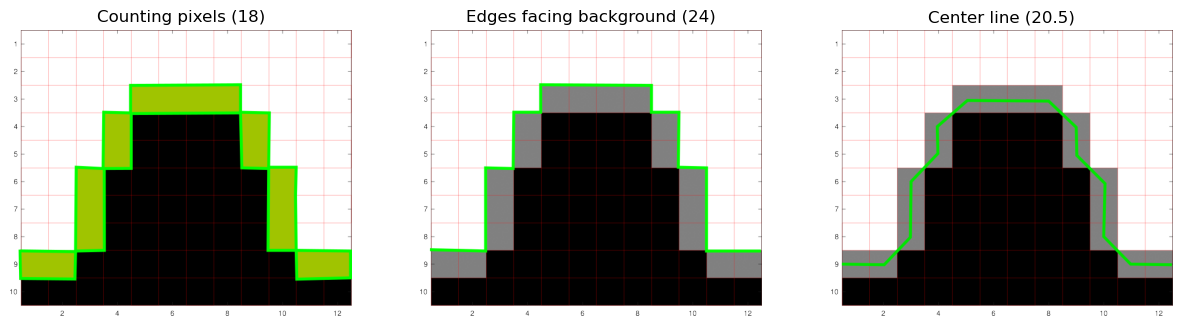

In [6]:
imgs=[plt.imread('figures/edge_detail_pixel_count.png'), 
      plt.imread('figures/edge_detail_outline.png'), 
      plt.imread('figures/edge_detail_centerline.png')]
lbls=['Counting pixels (18)', 'Edges facing background (24)','Center line (20.5)']

_,axs = plt.subplots(1,3, figsize=(15,6))
for ax,img,lbl in zip(axs,imgs,lbls) :
    ax.imshow(img)
    ax.set_title(lbl)
    ax.axis('off')

### Perimeter length with uncertainty

Let's assume we can trust the segmentation:
- Edge is 18 pixels long
- The pixel size is 0.043 mm/pixel $\pm$  0.2593%

#### Perimeter uncertainty equation
In this case we sum the edge pixels 

_Derivation of the equation_

The uncertainty of a sum of measurements $\sum^N_{i=1}x_i$ each with all $x_i$ uncorrelated and the same uncertainty $\sigma_x$. 

Lets start with the derivative:
$\frac{\partial f}{\partial x_i}=1\quad \forall i$

now the uncertainty is the squared sum of all $x_i$  

${\sigma_{\sum x_i}}^2 = \sum_{i=1}^N {\sigma_x}^2 = N {\sigma_x}^2$

which leads to 

$$\sigma_{\sum x_i} = \sigma_x \cdot \sqrt{N}$$

We have $\sigma_{Pixelsize}$=0.11 $\mu{}m$, which gives $\sigma_{Edgelength}=0.11\cdot\sqrt{18}=0.506 \mu{}m$

The edge length is 774 $\pm$ 0.5 $\mu{}m$

### Meassure water volume from gray levels
In neutron imaging it is common to quantify the water content from radiographs.

<div class="row">
<div class="column23">
    


- The transmission (gray level) $T=\frac{I}{I_0}=e^{-\mu \cdot d}$
    
- The metric pixel area (pixel size)

    
The water volume is $V_{water}=pixelsize^2 \cdot d$
    
    
    
Our uncertainties are now:
- Standard deviation of the transmission (confidence interval)
- The pixel size ... again
    


</div>
<div class="column13">
    
![](figures/pixel_volume.png)    
    
</div></div>    

### Volume with uncertainty

Let's assume we can trust the segmentation:
- Thickness $d=5\pm0.01~mm$
- The pixel size is $p=43 \pm 0.11~\mu{}m$

#### Volume uncertainty equation
In this case, we know the uncertainty of $V=p^2\cdot d$

_Derivation of the equation_

The uncertainty of a multi product $\prod^N_{i=1}x_i$ each with all $x_i$ uncorrelated and the uncertainty $\sigma_{x_i}$, or more specific $x^2\cdot y$ with $\sigma_{x}$ $\sigma_{y}$. 

Lets start with the derivative:  

$\frac{\partial (x^2\cdot y)}{\partial x}=2xy$  

and  

$\frac{\partial (x^2\cdot y)}{\partial y}=x^2$

Now the uncertainty is 
${\sigma_{x^2\cdot y}}^2 = \left(2xy \cdot \sigma_x \right)^2+ \left(x^2 \cdot \sigma_y \right)^2 $

Dividing both sides by $x^2\cdot y$ and taking the square root to get the relative uncertainty

$\frac{{\sigma_{x^2\cdot y}}}{x^2\cdot y} = \sqrt{\frac{\left(2xy \cdot \sigma_x \right)^2}{\left(x^2\cdot y\right)^2}+ \frac{\left(x^2 \cdot \sigma_y \right)^2}{\left(x^2\cdot y\right)^2} } = \sqrt{4\left(\frac{\sigma_x }{x}\right)^2+ \left(\frac{\sigma_y}{y}\right)^2}$
 

Which gives the relative uncertainty 
$$\frac{\sigma_V}{V}=\sqrt{4\left(\frac{\sigma_{Pixelsize}}{Pixelsize}\right)^2 + \left(\frac{\sigma_{d}}{d}\right)^2}$$

#### Computing the volume with uncertainty 
Plugging in the measurements in the equation:

$$\frac{\sigma_V}{V}=\sqrt{4\left(\frac{\sigma_{Pixelsize}}{Pixelsize}\right)^2 + \left(\frac{\sigma_{d}}{d}\right)^2}$$

In [10]:
d           = 5.0      # mm
d_unsertain = 0.01     # mm
p           = 0.043    # mm
p_uncertain = 0.00011  # mm

V = p**2 * d

rel_uncertainty = np.sqrt(4*(p_uncertain/p)**2 + (d_unsertain/d)**2)

print('Volume = {0:0.3f} mm3 +/- {1:0.4f}%'.format(V,rel_uncertainty*100))

Volume = 0.009 mm3 +/- 0.5493%


## Working with uncertainties

In [10]:
from uncertainties import ufloat
import numpy as np
from uncertainties import unumpy as unp

### Beer-Lamberts law
We want to compute the thickness of an item in transmission imaging. We know
- The attenuation coefficient $\mu=4.3\pm 0.1$
- The open beam intensity $I_0=10356\pm112$
- The open beam intensity $I=7654\pm80$

In [14]:
I0=ufloat(10356,112)
I=ufloat(7654,80)
mu=ufloat(4.3,0.1)

In [15]:
T = I/I0
print(T)

0.739+/-0.011


In [16]:
d=-unp.log(T)/mu
print(d)

0.070+/-0.004


In [17]:
d.std_dev/d.nominal_value

0.05491404288977086